# Preparations

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import sys
import math
import numpy as np
import collections

%matplotlib inline
import matplotlib.pyplot as plt

sys.path.append('../')
from higgs_inference import settings
from higgs_inference.various.utils import s_from_r


In [65]:
colors     = ['mediumblue',  'orange']
band_alpha = [ 0.,       0.]


In [41]:
margin_l_absolute = 8. * 0.1
margin_r_absolute = 8. * 0.02
margin_sep_absolute = 8. * 0.02
margin_t_absolute = 8. * 0.02
margin_b_absolute = 8. * 0.08

def calculate_height(n_panels=2, width=8.):
    
    if isinstance(n_panels, collections.Sequence):
        n_panels_h, n_panels_v = n_panels
    else:
        n_panels_h = n_panels
        n_panels_v = 1
    
    # Calculate horizontal margins. Units: relative to width.
    margin_l = margin_l_absolute / width
    margin_r = margin_r_absolute / width
    margin_l_subsequent = margin_l
    if n_panels_h > 2:
        margin_l_subsequent = margin_r
    margin_sep = margin_sep_absolute / width
    if n_panels_h > 2:
        margin_sep = 0
    margin_sep_total = margin_r + margin_sep + margin_l_subsequent
    panel_width = (1. - margin_l - margin_r - (n_panels_h - 1)*margin_sep_total) / n_panels_h
    
    # Calculate wspace argument of subplots_adjust
    wspace = margin_sep_total / panel_width
    
    # Calculate absolute height
    panel_height_absolute = panel_width * width # Square plots
    height = n_panels_v * (panel_height_absolute + margin_t_absolute + margin_b_absolute) + (n_panels_v - 1) * margin_sep_absolute
    
    # Calculate horizontal margins. Units: relative to width.
    panel_height = panel_height_absolute / height
    margin_t = margin_t_absolute / height
    margin_b = margin_b_absolute / height
    margin_sep_total = (margin_t + margin_b + margin_sep_absolute / height)
    
    # Calculate wspace argument of subplots_adjust
    hspace = margin_sep_total / panel_height
    
    # Return height
    return height


def adjust_margins(n_panels=2, width=8.):
    
    if isinstance(n_panels, collections.Sequence):
        n_panels_h, n_panels_v = n_panels
    else:
        n_panels_h = n_panels
        n_panels_v = 1
    
    # Calculate horizontal margins. Units: relative to width.
    margin_l = margin_l_absolute / width
    margin_r = margin_r_absolute / width
    margin_l_subsequent = margin_l
    if n_panels_h > 2:
        margin_l_subsequent = margin_r
    margin_sep = margin_sep_absolute / width
    if n_panels_h > 2:
        margin_sep = 0
    margin_sep_total = margin_r + margin_sep + margin_l_subsequent
    panel_width = (1. - margin_l - margin_r - (n_panels_h - 1)*margin_sep_total) / n_panels_h
    
    # Calculate wspace argument of subplots_adjust
    wspace = margin_sep_total / panel_width
    
    # Calculate absolute height
    panel_height_absolute = panel_width * width # Square plots
    height = n_panels_v * (panel_height_absolute + margin_t_absolute + margin_b_absolute) + (n_panels_v - 1) * margin_sep_absolute
    
    # Calculate horizontal margins. Units: relative to width.
    panel_height = panel_height_absolute / height
    margin_t = margin_t_absolute / height
    margin_b = margin_b_absolute / height
    margin_sep_total = (margin_t + margin_b + margin_sep_absolute / height)
    
    # Calculate wspace argument of subplots_adjust
    hspace = margin_sep_total / panel_height
    
    # Set margins
    plt.subplots_adjust(left = margin_l,
                        right = 1. - margin_r,
                        bottom = margin_b,
                        top = 1. - margin_t,
                        wspace = wspace)
    
#print(calculate_height(2,8.))
#print(calculate_height(3,8.))
#print(calculate_height((2,2),8.))

# Data

In [42]:
theta0 = 9
theta1 = 0


In [92]:
X = np.load('../data/unweighted_events/X_illustration.npy')
y = np.load('../data/unweighted_events/y_illustration.npy')
t = np.load('../data/unweighted_events/scores_illustration.npy')
r = np.load('../data/unweighted_events/r_illustration.npy')

pt = X[:,1]
deltaphi = X[:,41]

r_hat_histo = np.load('../results/histo/r_illustration_histo_2d_finebinning.npy')
r_hat_carl = r #np.load('../results/parameterized/r_illustration_combined_deep.npy')
r_hat_scoreregression = r #np.load('../results/score_regression/r_illustration_scoreregression_score_deep.npy')

s_hat_carl = s_from_r(r_hat_carl)
t_hat_scoreregression = t #np.load('../results/histo/that_illustration_scoreregression_score_deep.npy')


# Inference chain plot

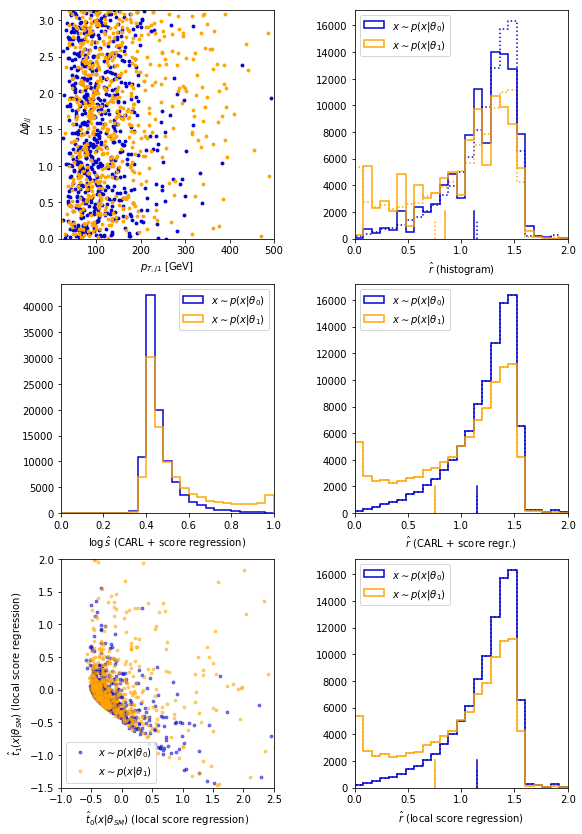

In [93]:
plt.figure(figsize=(8., calculate_height((2,3),8.)))

skip = 150
rmin, rmax = 0., 2.
bins = 25



ax = plt.subplot(3,2,1)

plt.scatter(pt[y==0][::skip], deltaphi[y==0][::skip], c=colors[0], s=8.)
plt.scatter(pt[y==1][::skip], deltaphi[y==1][::skip], c=colors[1], s=8.)

plt.xlabel(r'$p_{T,j1}$ [GeV]')
plt.ylabel(r'$\Delta\phi_{jj}$')
plt.xlim(20.,500.)
plt.ylim(0.,np.pi)



ax = plt.subplot(3,2,2)

plt.hist((r_hat_histo[y==0]), bins=bins, range=(rmin, rmax), color=colors[0], alpha=band_alpha[0])
plt.hist((r_hat_histo[y==1]), bins=bins, range=(rmin, rmax), color=colors[1], alpha=band_alpha[1])

plt.hist((r[y==0]), bins=bins, range=(rmin, rmax), color=colors[0], lw=1.5, ls=':', histtype='step')
plt.hist((r[y==1]), bins=bins, range=(rmin, rmax), color=colors[1], lw=1.5, ls=':', histtype='step')

plt.hist((r_hat_histo[y==0]), bins=bins, range=(rmin, rmax), color=colors[0], lw=1.5, histtype='step',
        label=r'$x \sim p(x | \theta_0)$')
plt.hist((r_hat_histo[y==1]), bins=bins, range=(rmin, rmax), color=colors[1], lw=1.5, histtype='step',
        label=r'$x \sim p(x | \theta_1)$')

plt.axvline(x=np.exp(np.mean(np.log(r[y==0]))), ymax=0.08,
            ls=':', c=colors[0], lw=1.5)
plt.axvline(x=np.exp(np.mean(np.log(r[y==1]))), ymax=0.08,
            ls=':', c=colors[1], lw=1.5)

plt.axvline(x=np.exp(np.mean(np.log(r_hat_histo[y==0]))), ymax=0.12,
            ls='-', c=colors[0], lw=1.5)
plt.axvline(x=np.exp(np.mean(np.log(r_hat_histo[y==1]))), ymax=0.12,
            ls='-', c=colors[1], lw=1.5)

plt.legend()
plt.xlabel(r'$\hat{r}$ (histogram)')
plt.xlim(rmin, rmax)
plt.ylim(0.,None)



ax = plt.subplot(3,2,3)

plt.hist((s_hat_carl[y==0]), bins=bins, range=(0.,1.), color=colors[0], alpha=band_alpha[0])
plt.hist((s_hat_carl[y==0]), bins=bins, range=(0.,1.), color=colors[0], lw=1.5, histtype='step',
        label=r'$x \sim p(x | \theta_0)$')

plt.hist((s_hat_carl[y==1]), bins=bins, range=(0.,1.), color=colors[1], alpha=band_alpha[1])
plt.hist((s_hat_carl[y==1]), bins=bins, range=(0.,1.), color=colors[1], lw=1.5, histtype='step',
        label=r'$x \sim p(x | \theta_1)$')

plt.legend()
plt.xlabel(r'$\log \, \hat{s}$ (CARL + score regression)')
plt.xlim(0.,1.)
plt.ylim(0.,None)



ax = plt.subplot(3,2,4)

plt.hist((r_hat_carl[y==0]), bins=bins, range=(rmin, rmax), color=colors[0], alpha=band_alpha[0])
plt.hist((r_hat_carl[y==1]), bins=bins, range=(rmin, rmax), color=colors[1], alpha=band_alpha[1])

plt.hist((r[y==0]), bins=bins, range=(rmin, rmax), color=colors[0], lw=1.5, ls=':', histtype='step')
plt.hist((r[y==1]), bins=bins, range=(rmin, rmax), color=colors[1], lw=1.5, ls=':', histtype='step')

plt.hist((r_hat_carl[y==0]), bins=bins, range=(rmin, rmax), color=colors[0], lw=1.5, histtype='step',
        label=r'$x \sim p(x | \theta_0)$')
plt.hist((r_hat_carl[y==1]), bins=bins, range=(rmin, rmax), color=colors[1], lw=1.5, histtype='step',
        label=r'$x \sim p(x | \theta_1)$')

plt.axvline(x=np.exp(np.mean(np.log(r[y==0]))), ymax=0.08,
            ls=':', c=colors[0], lw=1.5)
plt.axvline(x=np.exp(np.mean(np.log(r[y==1]))), ymax=0.08,
            ls=':', c=colors[1], lw=1.5)

plt.axvline(x=np.exp(np.mean(np.log(r_hat_carl[y==0]))), ymax=0.12,
            ls='-', c=colors[0], lw=1.5)
plt.axvline(x=np.exp(np.mean(np.log(r_hat_carl[y==1]))), ymax=0.12,
            ls='-', c=colors[1], lw=1.5)

plt.legend()
plt.xlabel(r'$\hat{r}$ (CARL + score regr.)')
plt.xlim(rmin, rmax)
plt.ylim(0.,None)



ax = plt.subplot(3,2,5)

plt.scatter((t_hat_scoreregression[y==0])[::skip,0], (t_hat_scoreregression[y==0])[::skip,1],
            c=colors[0], s=8., alpha=0.5, 
            label=r'$x \sim p(x | \theta_0)$')
plt.scatter((t_hat_scoreregression[y==1])[::skip,0], (t_hat_scoreregression[y==1])[::skip,1],
            c=colors[1], s=8., alpha=0.5, 
            label=r'$x \sim p(x | \theta_1)$')

plt.legend()
plt.xlabel(r'$\hat{t}_0 (x | \theta_{SM})$ (local score regression)')
plt.ylabel(r'$\hat{t}_1 (x | \theta_{SM})$ (local score regression)')
plt.xlim(-1.,2.5)
plt.ylim(-1.5,2.)



ax = plt.subplot(3,2,6)

plt.hist((r_hat_scoreregression[y==0]), bins=bins, range=(rmin, rmax), color=colors[0], alpha=band_alpha[0])
plt.hist((r_hat_scoreregression[y==1]), bins=bins, range=(rmin, rmax), color=colors[1], alpha=band_alpha[1])

plt.hist((r[y==0]), bins=bins, range=(rmin, rmax), color=colors[0], lw=1.5, ls=':', histtype='step')
plt.hist((r[y==1]), bins=bins, range=(rmin, rmax), color=colors[1], lw=1.5, ls=':', histtype='step')

plt.hist((r_hat_scoreregression[y==0]), bins=bins, range=(rmin, rmax), color=colors[0], lw=1.5, histtype='step',
        label=r'$x \sim p(x | \theta_0)$')
plt.hist((r_hat_scoreregression[y==1]), bins=bins, range=(rmin, rmax), color=colors[1], lw=1.5, histtype='step',
        label=r'$x \sim p(x | \theta_1)$')

plt.axvline(x=np.exp(np.mean(np.log(r[y==0]))), ymax=0.08,
            ls=':', c=colors[0], lw=1.5)
plt.axvline(x=np.exp(np.mean(np.log(r[y==1]))), ymax=0.08,
            ls=':', c=colors[1], lw=1.5)

plt.axvline(x=np.exp(np.mean(np.log(r_hat_scoreregression[y==0]))), ymax=0.12,
            ls='-', c=colors[0], lw=1.5)
plt.axvline(x=np.exp(np.mean(np.log(r_hat_scoreregression[y==1]))), ymax=0.12,
            ls='-', c=colors[1], lw=1.5)

plt.legend()
plt.xlabel(r'$\hat{r}$ (local score regression)')
plt.xlim(rmin, rmax)
plt.ylim(0.,None)



adjust_margins((2,3),8.)
plt.savefig("../figures/paper/inference_examples.pdf")

# Scatter score vs kinematics

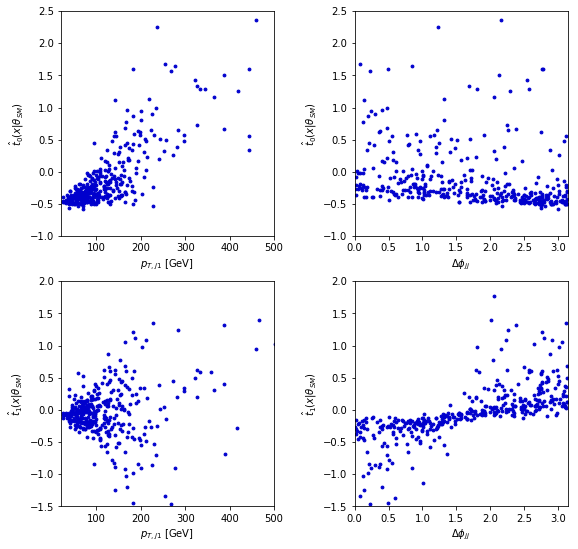

In [94]:
plt.figure(figsize=(8., calculate_height((2,2),8.)))

skip = 500
t0min, t0max = -1, 2.5
t1min, t1max = -1.5, 2.



ax = plt.subplot(2,2,1)

plt.scatter(pt[::skip], t[::skip,0], c=colors[0], s=8.)

plt.xlabel(r'$p_{T,j1}$ [GeV]')
plt.ylabel(r'$\hat{t}_0(x | \theta_{SM})$')
plt.xlim(20.,500.)
plt.ylim(t0min, t0max)



ax = plt.subplot(2,2,2)

plt.scatter(deltaphi[::skip], t[::skip,0], c=colors[0], s=8.)

plt.xlabel(r'$\Delta \phi_{jj}$')
plt.ylabel(r'$\hat{t}_0(x | \theta_{SM})$')
plt.xlim(0.,math.pi)
plt.ylim(t0min, t0max)



ax = plt.subplot(2,2,3)

plt.scatter(pt[::skip], t[::skip,1], c=colors[0], s=8.)

plt.xlabel(r'$p_{T,j1}$ [GeV]')
plt.ylabel(r'$\hat{t}_1(x | \theta_{SM})$')
plt.xlim(20.,500.)
plt.ylim(t1min, t1max)



ax = plt.subplot(2,2,4)

plt.scatter(deltaphi[::skip], t[::skip,1], c=colors[0], s=8.)

plt.xlabel(r'$\Delta \phi_{jj}$')
plt.ylabel(r'$\hat{t}_1(x | \theta_{SM})$')
plt.xlim(0.,math.pi)
plt.ylim(t1min, t1max)



adjust_margins((2,2),8.)
plt.savefig("../figures/paper/score_vs_observables.pdf")
